<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# United States Crime Rates in Relation to Poverty and Race from 2019

**Plan:**
My research will be based on my interest in criminal data and statistics, specifically in relation to poverty rates and racial population percentage. The data shown portrays that certain states of the U.S.obtain various crime rates. The data that I will be studying looks at state-by-state burglary and larceny rates that occurred in the United States within the year of 2019. In simple terms, larceny is theft/stealing. Burglary is defined as any sort of illegal entry into a building, home, or structure to commit a crime (typically theft). In addition to these results, I wanted to see if poverty rates and race/ethnicity populations may have some sort of correspondence or relation to the crime statistics found.


**Resources:**
The data I am using in my research comes from various sources as shown.

My geographic shapefile that I used to create my map was found at: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

The United States crime data is from Unified Crime Reporting Statistics, linked:
https://corgis-edu.github.io/corgis/csv/state_crime/

The poverty rates utilized are from the US Census, linked:
https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html

The U.S. race/ethnicity population data by percentage was found on wikipedia, linked: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_race/ethnicity


In [53]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


!pip install mapclassify
import mapclassify #need for thematic map classification

In [54]:
#state_crime=pd.read_csv('https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv', header=None)

In [55]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

Showing burglary rates from 2019:

In [57]:
#df1 = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
#Burg2019 = df1[df1.Year==2019]
#Burg2019

In [58]:
df1 = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
Burg2019 = df1[df1.Year==2019]
Burg2019 = Burg2019.drop("Year",axis=1)
Burg2019 = Burg2019.drop("Data.Population",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Property.All",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Property.Larceny",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Property.Motor",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Violent.All",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Violent.Assault",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Violent.Rape",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Violent.Robbery",axis=1)
Burg2019 = Burg2019.drop("Data.Rates.Violent.Murder",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Property.All",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Property.Burglary",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Property.Larceny",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Property.Motor",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Violent.All",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Violent.Murder",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Violent.Assault",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Violent.Rape",axis=1)
Burg2019 = Burg2019.drop("Data.Totals.Violent.Robbery",axis=1)
Burg2019

,State,Data.Rates.Property.Burglary
59,Alabama,531.9
119,Alaska,487.1
179,Arizona,394.3
239,Arkansas,599.6
299,California,386.1
359,Colorado,348.4
419,Connecticut,180.7
479,Delaware,304.8
539,District of Columbia,261.1
599,Florida,295.2


Showing larceny rates from 2019:

In [59]:
#df2 = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
#Larc2019 = df2[df2.Year==2019]
#Larc2019

In [60]:
df2 = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
Larc2019 = df2[df2.Year==2019]
Larc2019 = Larc2019.drop("Year",axis=1)
Larc2019 = Larc2019.drop("Data.Population",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.All",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.Burglary",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.Motor",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.All",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Assault",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Rape",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Robbery",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Murder",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.All",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Burglary",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Larceny",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Motor",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.All",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Murder",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Assault",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Rape",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Robbery",axis=1)
Larc2019

,State,Data.Rates.Property.Larceny
59,Alabama,1886.1
119,Alaska,2066.0
179,Arizona,1796.9
239,Arkansas,2012.6
299,California,1586.3
359,Colorado,1858.3
419,Connecticut,1078.7
479,Delaware,1782.7
539,District of Columbia,3775.4
599,Florida,1668.7


Merging the two data sets: burglary rates and larceny rates

In [61]:
crime_data = pd.merge(Burg2019, Larc2019, on='State', indicator=True)
crime_data

,State,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,_merge
0,Alabama,531.9,1886.1,both
1,Alaska,487.1,2066.0,both
2,Arizona,394.3,1796.9,both
3,Arkansas,599.6,2012.6,both
4,California,386.1,1586.3,both
5,Colorado,348.4,1858.3,both
6,Connecticut,180.7,1078.7,both
7,Delaware,304.8,1782.7,both
8,District of Columbia,261.1,3775.4,both
9,Florida,295.2,1668.7,both


Opening shapefile to create map:

In [62]:
! wget -q -O usmap.zip "https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip"
zip_ref = zipfile.ZipFile('usmap.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

<Axes: >

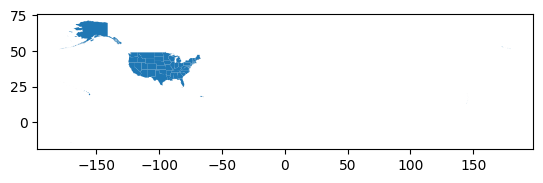

In [63]:
usmap=gpd.read_file('cb_2018_us_state_500k.shp')


usmap.plot()

In [64]:
#usmap.head(1)
usstate = usmap #.NAME
#usstate

In [65]:
del crime_data['_merge']       #pulling out _merge part from data before deleting, brackets pulls

In [66]:
map = pd.merge( usmap,crime_data, left_on='NAME', right_on='State', indicator=True)
#map

In [67]:
#shape_path = 'https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip'
#shape = gpd.read_file(shape_path)
#shape = pd.merge(
#    left=shape,
#    right=crime_data,
#    left_on='NAME',
#    right_on='State',
#    how='left'
#)

map = map.dropna()
map = map[~map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

<Axes: >

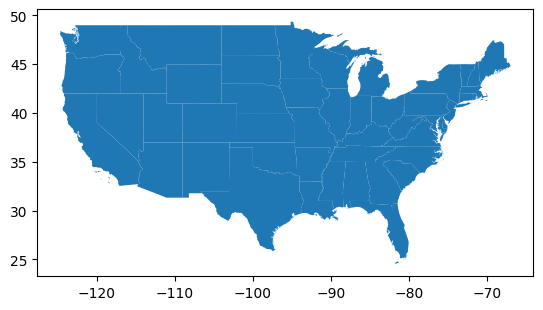

In [68]:
map.plot()

## Map of United States Property Burglary Data Rates from 2019:

<Axes: >

Text(0.5, 1.0, 'United States Property Burglary Data Rates from 2019')

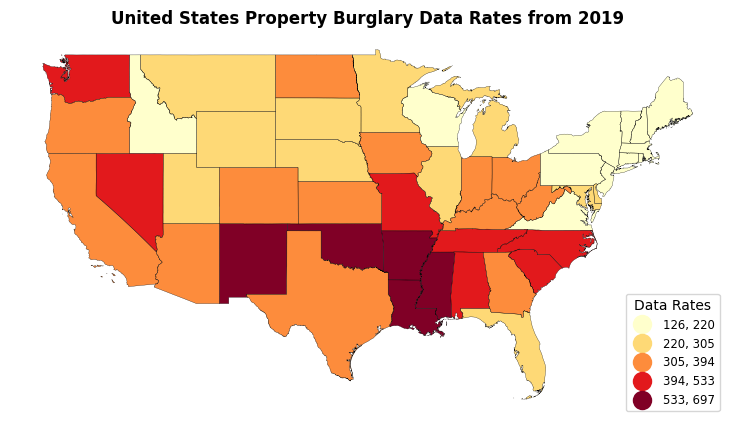

In [69]:
ax = map.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
map.plot(ax=ax, column='Data.Rates.Property.Burglary', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4, 'title': 'Data Rates'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Property Burglary Data Rates from 2019', size=12, weight='bold')

Map Interpretation: The map above shows the property burglary data rates from 2019 by state. As we can see, the rates are at the highest in the southern states of New Mexico, Oklahoma, Arkansas, Louisiana, and Mississippi.

## Map of U.S. Property Larceny Data Rates from 2019

<Axes: >

Text(0.5, 1.0, 'United States Property Larceny Data Rates from 2019')

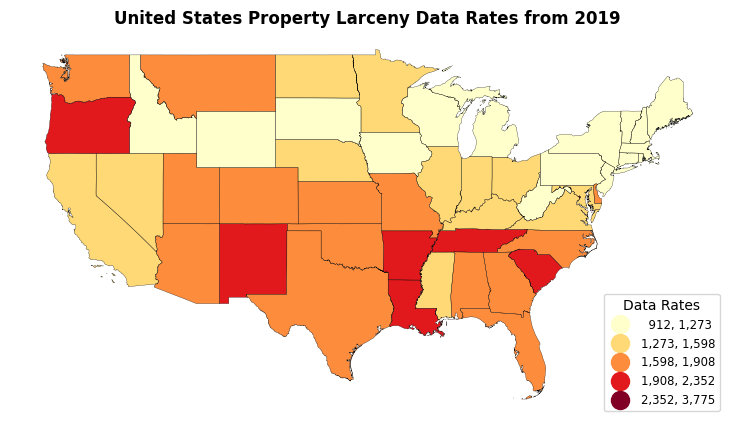

In [17]:
ax = map.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
map.plot(ax=ax, column='Data.Rates.Property.Larceny', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4, 'title': 'Data Rates'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Property Larceny Data Rates from 2019', size=12, weight='bold')

Map Interpretation: The map above shows the property larceny data rates from 2019 by state. Looking at the map, the states of Oregon, New Mexico, Arkansas, Louisiana, Tenessee, and South Carolina have higher rates of larceny. However,  the District of Columbia actually has thehighest rate of larceny. Due to it's small size, it is not easily visible. Below is the property larceny data rates by state, displaying that it is in fact the District of Columbia that acquires the highest rate.

In [78]:
#geomap.dtypes #shows data types
geomap[['State','Data.Rates.Property.Larceny']] #shows why dark red is on legend but not visible on map (DC is high)

,State,Data.Rates.Property.Larceny
0,Mississippi,1555.7
1,North Carolina,1666.0
2,Oklahoma,1835.5
3,Virginia,1359.5
4,West Virginia,1119.7
5,Louisiana,2352.4
6,Michigan,1121.3
7,Massachusetts,911.8
8,Idaho,911.8
9,Florida,1668.7


Now bringing in poverty rates:

In [71]:
poverty = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/poverty_by_state.csv")
poverty.rename(columns={'Rate': 'Poverty.Rate'}, inplace=True)
poverty

,State,Poverty.Rate
0,New Mexico,18.3
1,Mississippi,17.8
2,Louisiana,16.9
3,Arkansas,15.8
4,Oklahoma,15.8
5,Kentucky,15.8
6,West Virginia,15.5
7,Alabama,14.8
8,District of Columbia,14.7
9,Texas,13.7


Merging poverty rate data in with previous crime data:

In [19]:
map2 = pd.merge(crime_data, poverty)
map2

,State,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Poverty.Rate
0,Alabama,531.9,1886.1,14.8
1,Alaska,487.1,2066.0,11.5
2,Arizona,394.3,1796.9,12.1
3,Arkansas,599.6,2012.6,15.8
4,California,386.1,1586.3,11.4
5,Colorado,348.4,1858.3,8.5
6,Connecticut,180.7,1078.7,9.8
7,Delaware,304.8,1782.7,10.5
8,District of Columbia,261.1,3775.4,14.7
9,Florida,295.2,1668.7,13.1


Creating new maps consisting of crime rates along with poverty rates:

In [72]:
geomap = pd.merge(usmap, map2, left_on='NAME', right_on='State')
geomap = geomap.dropna()
geomap = geomap[~geomap['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [73]:
newmap = geomap.copy()

newmap["geometry"] = newmap["geometry"].centroid

<ipython-input-73-2e1d6d6fcb8d>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  newmap["geometry"] = newmap["geometry"].centroid


<Axes: >

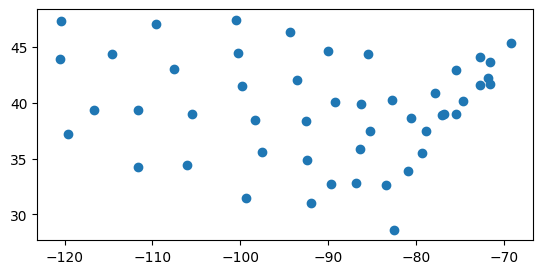

In [74]:
newmap.plot()

## Map of U.S. Property Burglary and Poverty Data Rates from 2019

Poverty interpretation: In regards to poverty, the top five states with tyhe highest poverty rates are New Mexico, Mississippi, Louisiana, Kentucky, and Oklahoma, respectively.

<Axes: >

<Axes: >

[]

[]

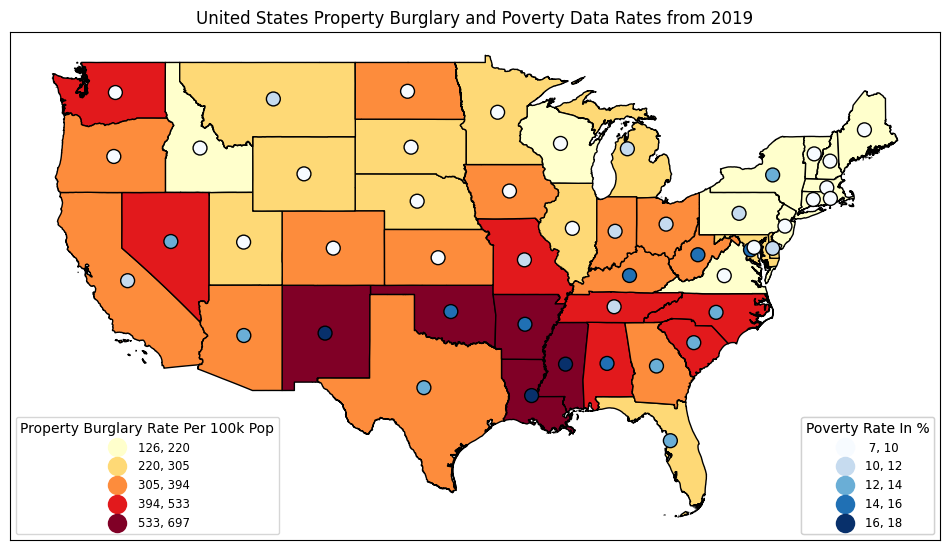

In [76]:
fig, ax = plt.subplots(1, figsize=(12,16))
geomap.plot(ax=ax,column='Data.Rates.Property.Burglary',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Property Burglary Rate Per 100k Pop''')

newmap.plot(ax=ax,column='Poverty.Rate',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("United States Property Burglary and Poverty Data Rates from 2019")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Poverty Rate In %''')



ax.add_artist(l2)
ax.add_artist(l1)

Map Interpretation: In this map, the previous map displaying the property burglary data rates from 2019 by state has been updated to also display poverty rates by states. According to the data shown, property burglary data rates seem to be at the highest in states that also obtain the highest poverty rates. This could indicate that there is some sort of relationship or influence between poverty and burglary.

### Map of U.S. Property Larceny and Poverty Data Rates from 2019

<Axes: >

<Axes: >

[]

[]

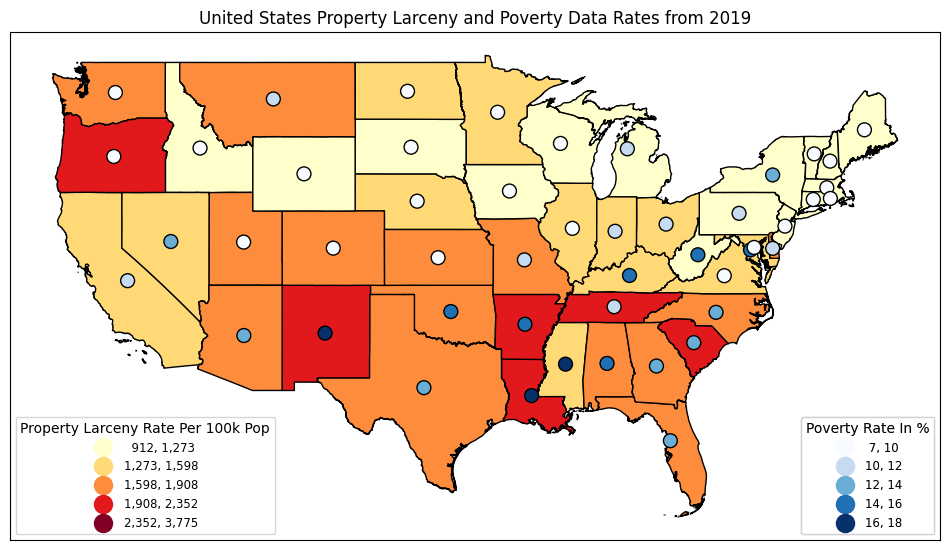

In [77]:
fig, ax = plt.subplots(1, figsize=(12,16))
geomap.plot(ax=ax,column='Data.Rates.Property.Larceny',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Property Larceny Rate Per 100k Pop''')

newmap.plot(ax=ax,column='Poverty.Rate',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("United States Property Larceny and Poverty Data Rates from 2019")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Poverty Rate In %''')



ax.add_artist(l2)
ax.add_artist(l1)

Map Interpretation: This map also ties in poverty rates with property larceny rates from 2019. In most states with higher larceny rates, poverty rates are also on the higher end of the spectrum. However, via this data, it is evident that states with lower poverty rates also have fewer property larceny rates. This map can also indicate that poverty rates have some sort of influence or relation on property larceny rates.



Adding the third variable, racial population:

In [79]:
#wikidata_race = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_race/ethnicity',match="Mixed")[0]

In [80]:
df3 = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/racedata.xlsx")
race_data = df3

indices_to_remove = [0, 1, 2, 3, 4, 56, 57, 58, 59, 60, 61, 62, 63]
race_data = race_data.drop(indices_to_remove)
race_data

,State,Total Population,White alone (NH),%,Black,%.1,Native American,%.2,Asian alone (NH),%.3,Pacific Islander alone (NH),%.4,Some Other Race alone (NH),%.5,Mixed Race,%.6,Hispanic or Latino,%.7
5,Alabama,5024279.0,3171351.0,0.6312,1288159,0.2564,23119,0.0046,75918.0,0.0151,2612.0,0.0005,14455.0,0.0029,184618,0.0367,264047,0.0526
6,Alaska,733391.0,421758.0,0.5751,20731,0.0283,108838,0.1484,43449.0,0.0592,12455.0,0.017,4575.0,0.0062,71761,0.0978,49824,0.0679
7,Arizona,7151502.0,3816547.0,0.5337,317161,0.0443,263930,0.0369,248837.0,0.0348,14323.0,0.002,31611.0,0.0044,266840,0.0373,2192253,0.3065
8,Arkansas,3011524.0,2063550.0,0.6852,449884,0.1494,20549,0.0068,51210.0,0.017,14280.0,0.0047,8047.0,0.0027,147157,0.0489,256847,0.0853
9,California,39538223.0,13714587.0,0.3469,2119286,0.0536,156085,0.0039,5978795.0,0.1512,138167.0,0.0035,223929.0,0.0057,1627722,0.0412,15579652,0.3940
10,Colorado,5773714.0,3760663.0,0.6513,221310,0.0383,33768,0.0058,195220.0,0.0338,9005.0,0.0016,29560.0,0.0051,260798,0.0452,1263798,0.2188
11,Connecticut,3605944.0,2279232.0,0.6321,360937,0.1001,6404,0.0018,170459.0,0.0473,974.0,0.0003,27076.0,0.0075,137569,0.0382,623293,0.1729
12,Delaware,989948.0,579851.0,0.5857,212960,0.2151,2521,0.0025,42398.0,0.0428,304.0,0.0003,4601.0,0.0046,43023,0.0435,104290,0.1053
13,District of Columbia,689545.0,261771.0,0.3796,282066,0.4091,1277,0.0019,33192.0,0.0481,349.0,0.0005,3753.0,0.0054,29485,0.0428,77652,0.1126
14,Florida,21538187.0,11100503.0,0.5154,3127052,0.1452,42169,0.002,629626.0,0.0292,11521.0,0.0005,137933.0,0.0064,792143,0.0368,5697240,0.2645


Pulling racial population % rates of minority races

In [81]:
race = race_data[['State','%.1', '%.2', '%.3', '%.4', '%.5', '%.6', '%.7' ]]
race.rename(columns={'%.1': 'African-American Pop%', '%.2':'Native American Pop%', '%.3':'Asian %Pop', '%.4':'Pac. Islander Pop%', '%.5':'Other Pop%', '%.6':'Mixed Race Pop%', '%.7':'Hispanic/Latino Pop%'}, inplace=True)
race

<ipython-input-81-bcd834d578dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race.rename(columns={'%.1': 'African-American Pop%', '%.2':'Native American Pop%', '%.3':'Asian %Pop', '%.4':'Pac. Islander Pop%', '%.5':'Other Pop%', '%.6':'Mixed Race Pop%', '%.7':'Hispanic/Latino Pop%'}, inplace=True)


,State,African-American Pop%,Native American Pop%,Asian %Pop,Pac. Islander Pop%,Other Pop%,Mixed Race Pop%,Hispanic/Latino Pop%
5,Alabama,0.2564,0.0046,0.0151,0.0005,0.0029,0.0367,0.0526
6,Alaska,0.0283,0.1484,0.0592,0.017,0.0062,0.0978,0.0679
7,Arizona,0.0443,0.0369,0.0348,0.002,0.0044,0.0373,0.3065
8,Arkansas,0.1494,0.0068,0.017,0.0047,0.0027,0.0489,0.0853
9,California,0.0536,0.0039,0.1512,0.0035,0.0057,0.0412,0.3940
10,Colorado,0.0383,0.0058,0.0338,0.0016,0.0051,0.0452,0.2188
11,Connecticut,0.1001,0.0018,0.0473,0.0003,0.0075,0.0382,0.1729
12,Delaware,0.2151,0.0025,0.0428,0.0003,0.0046,0.0435,0.1053
13,District of Columbia,0.4091,0.0019,0.0481,0.0005,0.0054,0.0428,0.1126
14,Florida,0.1452,0.002,0.0292,0.0005,0.0064,0.0368,0.2645


In [83]:
race['State']=race['State'].str.strip()
map2['State']=map2['State'].str.strip()     #stripping state columns of white spaces to align and get merge with data

<ipython-input-83-a245ec09402a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['State']=race['State'].str.strip()


Merging racial population data with previous crime and poverty data:

In [85]:
merge3 = pd.merge(map2, race, on='State', indicator=True, how='outer')       #merging race data in with other data
merge3

,State,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Poverty.Rate,African-American Pop%,Native American Pop%,Asian %Pop,Pac. Islander Pop%,Other Pop%,Mixed Race Pop%,Hispanic/Latino Pop%,_merge
0,Alabama,531.9,1886.1,14.8,0.2564,0.0046,0.0151,0.0005,0.0029,0.0367,0.0526,both
1,Alaska,487.1,2066.0,11.5,0.0283,0.1484,0.0592,0.017,0.0062,0.0978,0.0679,both
2,Arizona,394.3,1796.9,12.1,0.0443,0.0369,0.0348,0.002,0.0044,0.0373,0.3065,both
3,Arkansas,599.6,2012.6,15.8,0.1494,0.0068,0.017,0.0047,0.0027,0.0489,0.0853,both
4,California,386.1,1586.3,11.4,0.0536,0.0039,0.1512,0.0035,0.0057,0.0412,0.3940,both
5,Colorado,348.4,1858.3,8.5,0.0383,0.0058,0.0338,0.0016,0.0051,0.0452,0.2188,both
6,Connecticut,180.7,1078.7,9.8,0.1001,0.0018,0.0473,0.0003,0.0075,0.0382,0.1729,both
7,Delaware,304.8,1782.7,10.5,0.2151,0.0025,0.0428,0.0003,0.0046,0.0435,0.1053,both
8,District of Columbia,261.1,3775.4,14.7,0.4091,0.0019,0.0481,0.0005,0.0054,0.0428,0.1126,both
9,Florida,295.2,1668.7,13.1,0.1452,0.002,0.0292,0.0005,0.0064,0.0368,0.2645,both


Pulling African-American racial population data as focus of interest:

In [86]:
afr_am = race_data[['State','%.1']]
afr_am.rename(columns={'%.1': 'African-American Pop%'}, inplace=True)
afr_am

<ipython-input-86-956d811453aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_am.rename(columns={'%.1': 'African-American Pop%'}, inplace=True)


,State,African-American Pop%
5,Alabama,0.2564
6,Alaska,0.0283
7,Arizona,0.0443
8,Arkansas,0.1494
9,California,0.0536
10,Colorado,0.0383
11,Connecticut,0.1001
12,Delaware,0.2151
13,District of Columbia,0.4091
14,Florida,0.1452


Creating heat maps for racial population data by state:

In [87]:
import seaborn as sns

In [88]:
#race[:51].style.background_gradient(cmap='YlOrRd')

## African-American Population % by State Heat Map:

In [89]:
sorted_afr = afr_am.sort_values(by='African-American Pop%', ascending=False)[:51]
styled_df_afr = sorted_afr.style.background_gradient(cmap='YlOrRd')

styled_df_afr

,State,African-American Pop%
13,District of Columbia,0.409100
29,Mississippi,0.364400
23,Louisiana,0.311800
15,Georgia,0.306000
25,Maryland,0.290600
5,Alabama,0.256400
45,South Carolina,0.247900
12,Delaware,0.215100
38,North Carolina,0.201900
51,Virginia,0.182800


Heat Map Interpretation: The above heat map is specifically focused on the African-Americcan population percentage. The top five areas with the highest African-American population percentages are the District of Columbia, Mississippi, Louisiana, Georgia, and Maryland. It has been found through this data that states with a higher African-American population percentage are also those consisting of higher poverty and crime rates. It may be interesting and beneficial to conduct more research on this correlation between the variables to find a solution. For example, research on social capital, education, recreational activity, childcare, etc. may show interesting trends that can be utilized for improvement.

## Minority Population % by State Heat Map:

In [85]:
sorted_race = race.reindex(sorted(race.columns), axis=1)
styled_df = sorted_race.style.background_gradient(cmap='YlOrRd')
styled_df


,African-American Pop%,Asian %Pop,Hispanic/Latino Pop%,Mixed Race Pop%,Native American Pop%,Other Pop%,Pac. Islander Pop%,State
5,0.256400,0.015100,0.052600,0.036700,0.004600,0.002900,0.000500,Alabama
6,0.028300,0.059200,0.067900,0.097800,0.148400,0.006200,0.017000,Alaska
7,0.044300,0.034800,0.306500,0.037300,0.036900,0.004400,0.002000,Arizona
8,0.149400,0.017000,0.085300,0.048900,0.006800,0.002700,0.004700,Arkansas
9,0.053600,0.151200,0.394000,0.041200,0.003900,0.005700,0.003500,California
10,0.038300,0.033800,0.218800,0.045200,0.005800,0.005100,0.001600,Colorado
11,0.100100,0.047300,0.172900,0.038200,0.001800,0.007500,0.000300,Connecticut
12,0.215100,0.042800,0.105300,0.043500,0.002500,0.004600,0.000300,Delaware
13,0.409100,0.048100,0.112600,0.042800,0.001900,0.005400,0.000500,District of Columbia
14,0.145200,0.029200,0.264500,0.036800,0.002000,0.006400,0.000500,Florida


Heat Map Interpretation: Above is a heat map consisting of all minority racial population percentages.